In [1]:
import numpy as np
import ROOT
from ROOT import gSystem, gROOT
from ROOT import *
import pyspark

Welcome to JupyROOT 6.24/02


## Distributed execution

/home/user/Products/root/lib/DistRDF/Node.py:591: UserWarning: Number of partitions is greater than number of clusters in the dataset. Using 1 partition(s)
  return self._get_clustered_ranges(treename, inputfiles, friendinfo)


959.0803231898991
22/06/21 13:22:45 WARN Utils: Your hostname, user-Lenovo-ideapad-330S-14IKB resolves to a loopback address: 127.0.1.1; using 10.1.198.50 instead (on interface wlp1s0)
22/06/21 13:22:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/06/21 13:22:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Info in <TCanvas::Print>: png file Bupt_m10.png has been created                


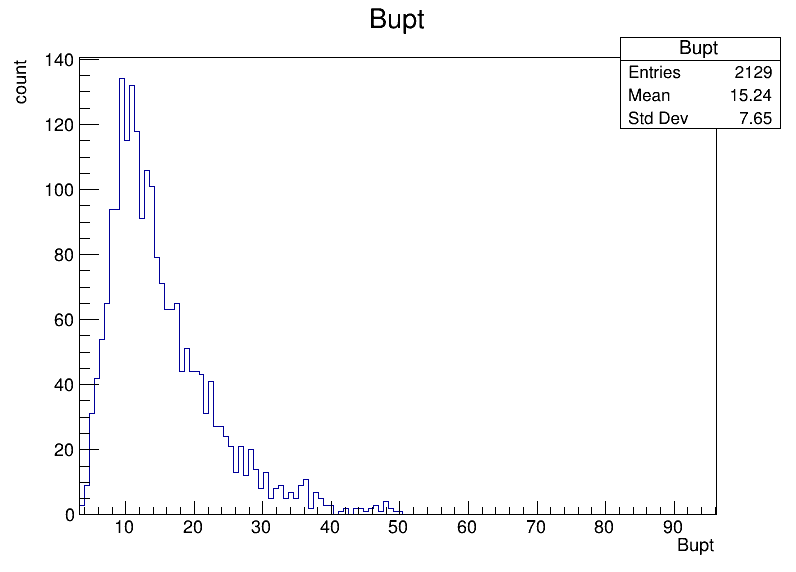

In [2]:

 
# Point RDataFrame calls to the Spark specific RDataFrame
RDataFrame = ROOT.RDF.Experimental.Distributed.Spark.RDataFrame

fdata1 = "../../BuHI/Histos/finaltree_Bujk_AOD_HI2016_sample1.root"
fdata2 = "../../BuHI/Histos/finaltree_Bujk_AOD_HI2016_sample2.root"
 
# It still accepts the same constructor arguments as traditional RDataFrame
df = RDataFrame("Butree", fdata1)
 
# Continue the application with the traditional RDataFrame API
sum = df.Filter("Bupt > 10").Sum("WeightD")
h = df.Histo1D("Bupt")
 
print(sum.GetValue())

canv = TCanvas("Bupt","Bupt",50,50,800,600)
canv.cd()
canv.Draw()

h.Draw()
canv.SaveAs("Bupt_m10.png")

#### Connecting to a Spark cluster

In [3]:
from pyspark import *
from pyspark.conf import SparkConf
from pyspark.context import SparkContext

# Create a SparkContext object with the right configuration for your Spark cluster
conf = SparkConf().setAppName("My name").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
 
# Point RDataFrame calls to the Spark specific RDataFrame
RDataFrame = ROOT.RDF.Experimental.Distributed.Spark.RDataFrame
 
# The Spark RDataFrame constructor accepts an optional "sparkcontext" parameter
# and it will distribute the application to the connected cluster
df = RDataFrame("Butree", fdata2, sparkcontext = sc)


#### Connecting to a Dask cluster

In [4]:
from dask.distributed import Client
from dask.distributed import Client

from dask import *

import ROOT

from ROOT import RDataFrame

# Point RDataFrame calls to the Dask specific RDataFrame
RDataFrame = ROOT.RDF.Experimental.Distributed.Dask.RDataFrame

# Create the Client object to connect to the Dask cluster
# See the Dask documentation for all the options available
client = Client("DASK_SCHEDULER_ADDRESS")

# It still accepts the same constructor arguments as traditional RDataFrame
# And supports some extra keyword arguments
df = RDataFrame("Butree", fdata1, npartitions = 8, daskclient = client)



AttributeError: module 'ROOT.RDF.Experimental.Distributed' has no attribute 'Dask'